In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.optimize import minimize
from scipy.signal import medfilt

In [47]:
sigmoid = lambda x: 1 / (1 + np.exp(-x))

In [89]:
def fwd(params, signal):
    xparams = np.concatenate((params[1:][::-1], params))
    smoothed = np.convolve(signal, xparams, mode="same")
    return smoothed

In [90]:
def loss(params, signal, truth):
    smoothed = fwd(params, signal)
    return np.linalg.norm(smoothed - truth)

In [91]:
x = np.linspace(0, 10)
y = np.sin(x)
yn = y + np.random.normal(size=x.size) + np.random.poisson(size=x.size)

In [96]:
sol = minimize(
    loss, np.ones(3), (yn, medfilt(gaussian_filter(yn, sigma=1))), method="L-BFGS-B"
)

[0.08186853 0.24200078 0.34667819 0.24200078 0.08186853]


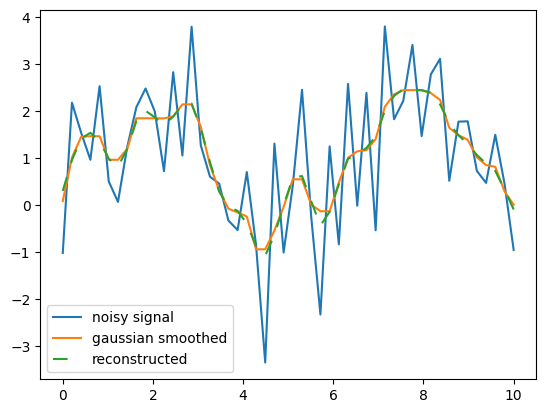

In [99]:
plt.plot(x, yn, label="noisy signal")
plt.plot(x, medfilt(gaussian_filter(yn, sigma=1)), label="gaussian smoothed")
plt.plot(x, fwd(sol.x, yn), ls="--", dashes=(7, 7), label="reconstructed")
plt.legend()
print(np.concatenate((sol.x[1:][::-1], sol.x)))